https://towardsdatascience.com/classifying-complaints-with-natural-language-processing-e3b2765d525f

# KSA Classifier Notebook Using NLP and ML

This notebook uses natural language processing and machine learning to classify IAM job knowledge, skills, and tasks based on the job description text.

## 1. Install and load packages

In [ ]:
pip install numpy pandas sklearn wordcloud textblob

In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string

## 2. Load data into a dataframe

In [12]:
df = pd.read_csv("data-jobs-20221123.csv", encoding = "utf-8")
df.info()
df['role'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job_title    453 non-null    object
 1   role         453 non-null    object
 2   description  453 non-null    object
dtypes: object(3)
memory usage: 10.7+ KB


engineer         147
analyst           88
manager           59
developer         42
director          41
leadership        22
administrator     20
architect         20
specialist        14
Name: role, dtype: int64

## 3. Tokenize and clean job description

In [17]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english') + list (string.punctuation)

other_stop_words = ['job', 'summary']

stop_words.extend(other_stop_words)

#lowercase
df["desc_1"] = df.description.str.lower()

#remove \n
df["desc_2"] = df.desc_1.str.replace("\n", " ")

#remove punctuation and tokenize
df["Tokens"] = df.apply(lambda row: tokenizer.tokenize(row['desc_2']), axis=1)

#remove stopwords
df['Tokens_1'] = df['Tokens'].apply(lambda x: [item for item in x if item not in stop_words])

#merge tokens back into string text
df['desc_3']=[" ".join(txt) for txt in df["Tokens_1"].values]

#create bigrams
df["Tokens_2"] = df["Tokens_1"].apply(lambda row: list(ngrams(row, 3)))
df.head()

,job_title,role,description,desc_1,desc_2,Tokens,Tokens_1,desc_3,Tokens_2
0,Identity and Access Management Administrator,administrator,Job Summary\nThe Identity and Access Managemen...,job summary\nthe identity and access managemen...,job summary the identity and access management...,"[job, summary, the, identity, and, access, man...","[identity, access, management, administrator, ...",identity access management administrator shall...,"[(identity, access, management), (access, mana..."
1,Systems Administrator (Hybrid Remote),administrator,Systems Administrator (Hybrid Remote)\n\nChris...,systems administrator (hybrid remote)\n\nchris...,systems administrator (hybrid remote) christa...,"[systems, administrator, hybrid, remote, chris...","[systems, administrator, hybrid, remote, chris...",systems administrator hybrid remote christar i...,"[(systems, administrator, hybrid), (administra..."
2,IT Administrator/Helpdesk,administrator,IT Administrator/Helpdesk\nIf you are a IT Adm...,it administrator/helpdesk\nif you are a it adm...,it administrator/helpdesk if you are a it admi...,"[it, administrator, helpdesk, if, you, are, a,...","[administrator, helpdesk, administrator, least...",administrator helpdesk administrator least two...,"[(administrator, helpdesk, administrator), (he..."
3,IT Administrator/Helpdesk L2/L3,administrator,IT Administrator/Helpdesk L2/L3\nIf you are a ...,it administrator/helpdesk l2/l3\nif you are a ...,it administrator/helpdesk l2/l3 if you are a i...,"[it, administrator, helpdesk, l2, l3, if, you,...","[administrator, helpdesk, l2, l3, administrato...",administrator helpdesk l2 l3 administrator lea...,"[(administrator, helpdesk, l2), (helpdesk, l2,..."
4,Identity Access Management AD Systems Administ...,administrator,Deloitte Global is the engine of the Deloitte ...,deloitte global is the engine of the deloitte ...,deloitte global is the engine of the deloitte ...,"[deloitte, global, is, the, engine, of, the, d...","[deloitte, global, engine, deloitte, network, ...",deloitte global engine deloitte network profes...,"[(deloitte, global, engine), (global, engine, ..."


## 4. Generate Labels (label)

In [6]:
encoder = LabelEncoder()
label = encoder.fit_transform(df.role)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8
 8 8 8 8 8 8 8 8 8]


## 5. Transform job description text into term frequency–inverse document frequency (TDIDF) format and make ML model with accuracy score

Determine the classifer accuracy based on the max words.

In [8]:
v = TfidfVectorizer(max_features=200, min_df=.2, max_df=.85)

x = df["desc_3"]

v.fit(x)

x_tfidf = v.transform(x)

#print(x_tfidf)

#use to see high frequency words
#print(v2.get(99))

#print(v.vocabulary_)

# Classifier - Algorithm - SVM
s = svm.LinearSVC(C=1.0)

# fit the training dataset on the classifier
s.fit(x_tfidf, label)# predict the labels on validation dataset

# make predictions using the trained model
s_pred = s.predict(x_tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(s_pred, label)*100)


SVM Accuracy Score ->  92.05298013245033


## 7. Identify model gaps using confusion matrix

Confusion matrix, without normalization


array(['administrator', 'analyst', 'architect', 'developer', 'director',
       'engineer', 'leadership', 'manager', 'specialist'], dtype=object)

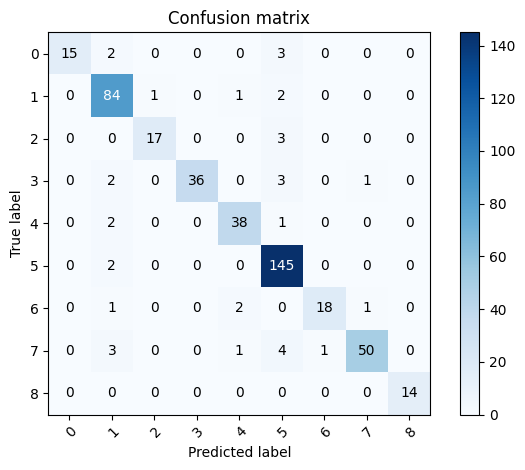

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names = np.unique(label)

plot_confusion_matrix(label, s_pred, classes=class_names, title='Confusion matrix')

np.unique(df.role)

## 8. Plot roles

/Users/kenmye/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kenmye/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


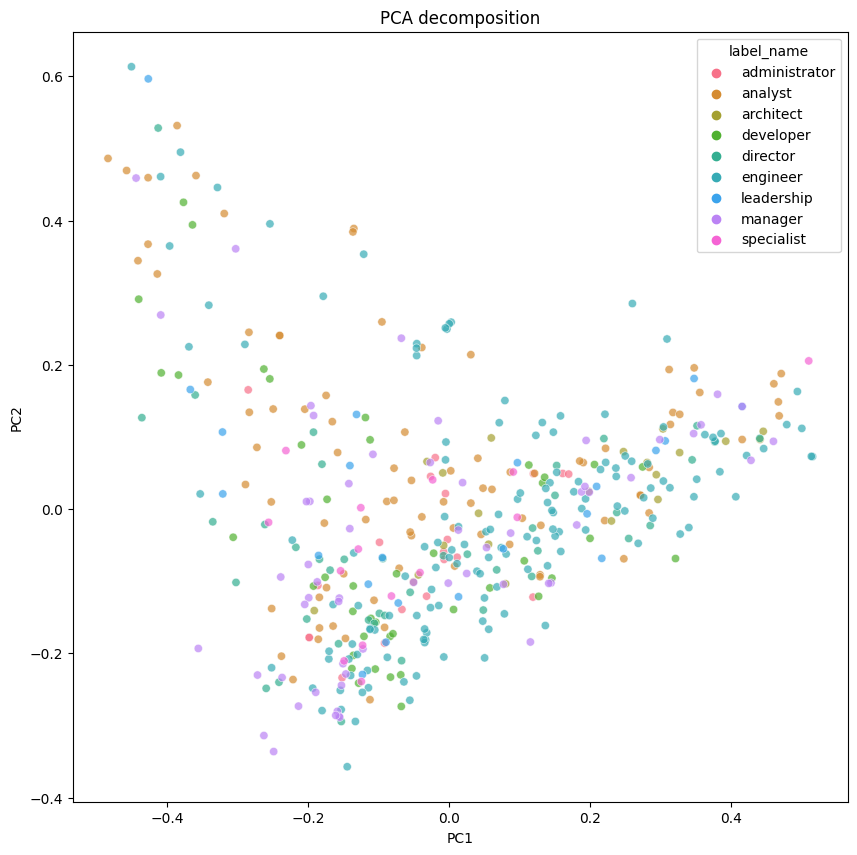

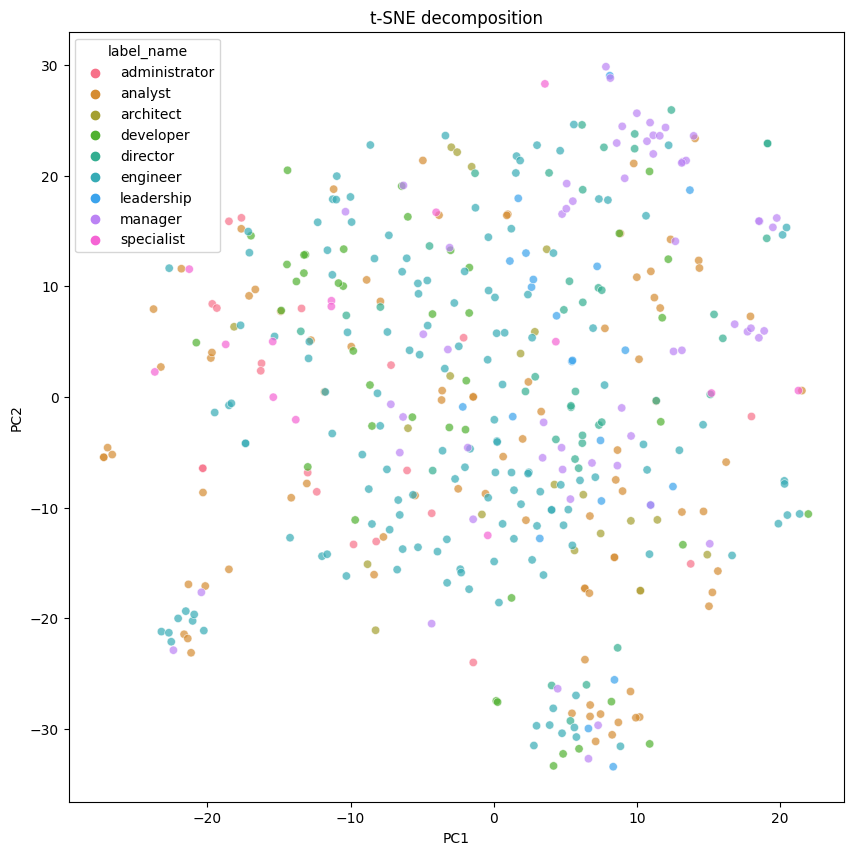

In [37]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'administrator',
        "1": 'analyst',
        "2": 'architect',
        "3": 'developer',
        "4": 'director',
        "5": 'engineer',
        "6": 'leadership',
        "7": 'manager',
        "8": 'specialist'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.set_palette("hls", 5)
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    #palette=["red", "orange", "darkgreen", "blue", "purple"],
                    alpha=.7).set_title(title);

plot_dim_red("PCA", features=x_tfidf.toarray(), labels=label, n_components=2)

plot_dim_red("TSNE", features=x_tfidf.toarray(), labels=label, n_components=2)

df["SVM_Prediction"] = s_pred

#from pathlib import Path  
#filepath = Path('out.csv')  
#df.to_csv(filepath) 